<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-2-Kaggle-Challenge/blob/master/module1/LS_DS_221_assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*
#Decision Trees
Assignment
- Sign up for a Kaggle account, if you don’t already have one. 
- Go to our Kaggle InClass competition website. 
- You will be given the URL in Slack. 
- Go to the Rules page. Accept the rules of the competition.
- Do train/validate/test split with the Tanzania Waterpumps data.
- Begin with baselines for classification.
- Select features. Use a scikit-learn pipeline
- to encode categoricals, impute missing values,
-  and fit a decision tree classifier.
- Get your validation accuracy score.
- Get and plot your feature importances.
- Submit your predictions to our Kaggle competition. 
- (Go to our Kaggle InClass competition webpage. 
- Use the blue Submit Predictions button to upload your CSV file.
-  Or you can use the Kaggle API to submit your predictions.)
- Commit your notebook to your fork of the GitHub repo.

---

In [0]:

%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
train_location = X_train[['longitude', 'latitude']].copy()
val_location = X_val[['longitude', 'latitude']].copy()

In [71]:
# With just long & lat, a Logistic Regression can't beat the majority classifier baseline

lr = make_pipeline(
    SimpleImputer(),
    LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1)
)

lr.fit(train_location, y_train)
print('Logistic Regression:')
print('Train Accuracy', lr.score(train_location, y_train))
print('Validation Accuracy', lr.score(val_location, y_val))

Logistic Regression:
Train Accuracy 0.5430765993265994
Validation Accuracy 0.5430976430976431


In [55]:
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [56]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [58]:
# TODO
from sklearn.tree import DecisionTreeClassifier

# These are the only two changes from the previous code cell:
# Remove Standadscaler (it's not needed or helpful for trees)
# Change the model from LogisticRegression to DecisionTreeClassifier
pipeline = make_pipeline(
  ce.OneHotEncoder(use_cat_names=True),
  SimpleImputer(strategy='mean'),
  DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
)

# Fit on train
pipeline.fit(X_train, y_train)
# Score on val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val)) # Fit on train
# Predict on test
y_pred = pipeline.predict(X_test)

Train Accuracy 0.8069444444444445
Validation Accuracy 0.7713804713804714


In [59]:
# TODO 
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), 
    #SelectKBest # supposedly would work also
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver ='lbfgs', n_jobs=-1)         
)

# Fit on train
pipeline.fit(X_train, y_train)
# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))
# Predict on test
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7319023569023569


In [0]:
# TODO
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

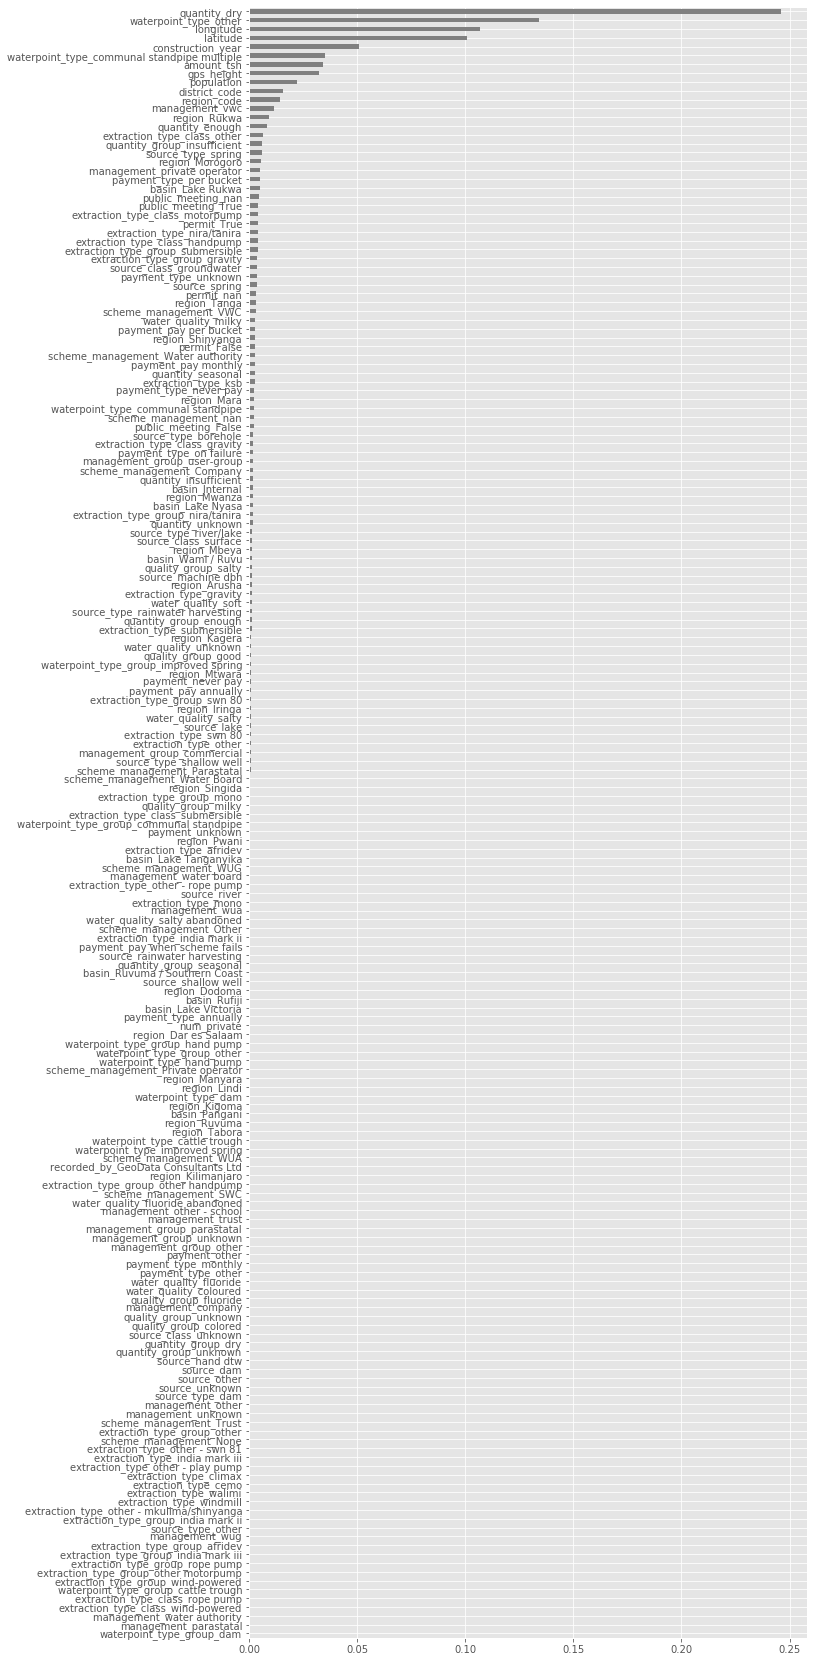

In [66]:
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');


In [0]:
test-1 = forest.predict(Xtest)
submission = sample_submission.copy()
submission['status_group'] = test-1
submission.to_csv(kag_water)